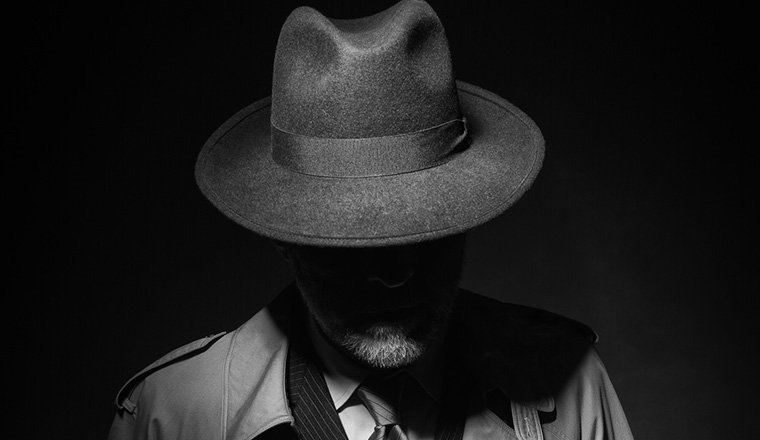

**Adım 1: Küme sayısı belirlenir.**

**Adım 2: Rastgele k merkez seçilir.**

**Adım 3: Her gözlem için k merkezlere uzaklıklar hesaplanır.**

**Adım 4: Her gözlem en yakın olduğu merkeze yani kümeye atanır.**

**Adım 5: Atama işlemlerinden sonra oluşan kümeler için tekrar merkez hesaplamaları yapılır.**

**Adım 6: Bu işlem belirlenen bir iterasyon adedince tekrar edilir ve küme içi hata karaler toplamlarının toplamının (total within-cluster variation) mininum olduğu durumdaki gözlemlerin kümelenme yapısı nihai küemelenme olarak seçilir.**

<h1><center><span style="font-family:Georgia;color:#E8DCCC;font-weight:bold;background:#97A37B"> 📚Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from yellowbrick.cluster import KElbowVisualizer
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder

In [2]:
#dataseti okutma
df = pd.read_csv("../input/usarrests/USArrests.csv", index_col=0)
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


<h1><center><span style="font-family:Georgia;color:#E8DCCC;font-weight:bold;background:#97A37B"> 🔍Exploratory Data Analysis

In [3]:
#eksik gözlemlere bakma
df.isnull().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [4]:
#betimsel istatistikler
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Murder,50.0,7.788,4.355510,0.8,4.075,7.25,11.250,17.4
Assault,50.0,170.760,83.337661,45.0,109.000,159.00,249.000,337.0
UrbanPop,50.0,65.540,14.474763,32.0,54.500,66.00,77.750,91.0
Rape,50.0,21.232,9.366385,7.3,15.075,20.10,26.175,46.0


In [5]:
#scale
sc = MinMaxScaler((0, 1))
df = sc.fit_transform(df)

In [6]:
df[0:5]

array([[0.74698795, 0.65410959, 0.44067797, 0.35917313],
       [0.55421687, 0.74657534, 0.27118644, 0.96124031],
       [0.43975904, 0.85273973, 0.81355932, 0.6124031 ],
       [0.48192771, 0.49657534, 0.30508475, 0.31524548],
       [0.4939759 , 0.79109589, 1.        , 0.86046512]])

In [7]:
#kümeleme
kmeans = KMeans(n_clusters=4)
k_fit = kmeans.fit(df)

In [8]:
#kaç küme var
k_fit.n_clusters

4

In [9]:
k_fit.cluster_centers_

array([[0.60333642, 0.72734457, 0.74576271, 0.66905188],
       [0.1686747 , 0.11485774, 0.34028683, 0.12601868],
       [0.29254518, 0.32148973, 0.70974576, 0.29667313],
       [0.79141566, 0.6802226 , 0.36864407, 0.36466408]])

In [10]:
k_fit.labels_

array([3, 0, 0, 3, 0, 0, 2, 2, 0, 3, 2, 1, 0, 2, 1, 2, 1, 3, 1, 0, 2, 0,
       1, 3, 0, 1, 1, 0, 1, 2, 0, 0, 3, 1, 2, 2, 2, 2, 2, 3, 1, 3, 0, 2,
       1, 2, 2, 1, 1, 2], dtype=int32)

In [11]:
#toplam hata
k_fit.inertia_

3.690820410392111

In [12]:
df[0:5]

array([[0.74698795, 0.65410959, 0.44067797, 0.35917313],
       [0.55421687, 0.74657534, 0.27118644, 0.96124031],
       [0.43975904, 0.85273973, 0.81355932, 0.6124031 ],
       [0.48192771, 0.49657534, 0.30508475, 0.31524548],
       [0.4939759 , 0.79109589, 1.        , 0.86046512]])

<h1><center><span style="font-family:Georgia;color:#E8DCCC;font-weight:bold;background:#97A37B"> 🌈Visualization of Clusters

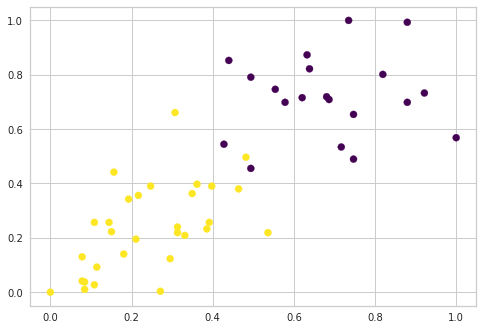

In [13]:
k_means = KMeans(n_clusters=2).fit(df)
kumeler = k_means.labels_
type(df)
df = pd.DataFrame(df)

plt.scatter(df.iloc[:, 0],
            df.iloc[:, 1],
            c=kumeler,
            s=50,
            cmap="viridis")
plt.show()

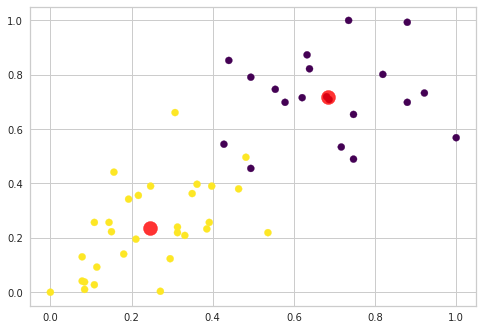

In [14]:
# marking of centers
merkezler = k_means.cluster_centers_

plt.scatter(df.iloc[:, 0],
            df.iloc[:, 1],
            c=kumeler,
            s=50,
            cmap="viridis")

plt.scatter(merkezler[:, 0],
            merkezler[:, 1],
            c="red",
            s=200,
            alpha=0.8)
plt.show()

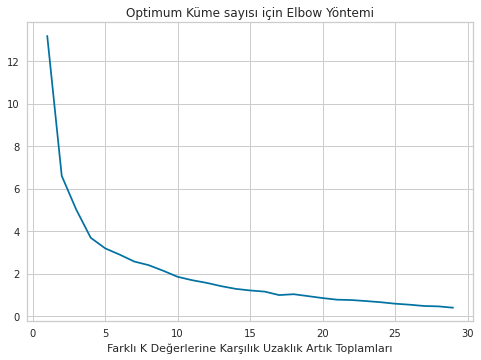

In [15]:
#Determination of the Optimal Number of Clusters
kmeans = KMeans()
ssd = []
K = range(1, 30)

for k in K:
    kmeans = KMeans(n_clusters=k).fit(df)
    ssd.append(kmeans.inertia_)

plt.plot(K, ssd, "bx-")
plt.xlabel("Farklı K Değerlerine Karşılık Uzaklık Artık Toplamları")
plt.title("Optimum Küme sayısı için Elbow Yöntemi")
plt.show()


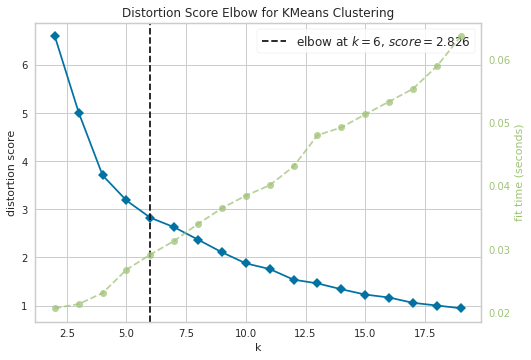

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [16]:
# A more practical way:
kmeans = KMeans()
elbow = KElbowVisualizer(kmeans, k=(2, 20))
elbow.fit(df)
elbow.show()

In [17]:
elbow.elbow_value_

6

<h1><center><span style="font-family:Georgia;color:#E8DCCC;font-weight:bold;background:#97A37B"> 🏁 Creation of Final Clusters

In [18]:
kmeans = KMeans(n_clusters=elbow.elbow_value_).fit(df)
kumeler = kmeans.labels_

In [19]:
df = pd.read_csv("../input/usarrests/USArrests.csv", index_col=0)

In [20]:
pd.DataFrame({"Eyaletler": df.index, "Kumeler": kumeler})

,Eyaletler,Kumeler
0,Alabama,1
1,Alaska,3
2,Arizona,3
3,Arkansas,4
4,California,3
5,Colorado,3
6,Connecticut,2
7,Delaware,4
8,Florida,3
9,Georgia,1


In [21]:
df["cluster_no"] = kumeler

df["cluster_no"] = df["cluster_no"] + 1

df.head()

,Murder,Assault,UrbanPop,Rape,cluster_no
Alabama,13.2,236,58,21.2,2
Alaska,10.0,263,48,44.5,4
Arizona,8.1,294,80,31.0,4
Arkansas,8.8,190,50,19.5,5
California,9.0,276,91,40.6,4


In [22]:
df.groupby("cluster_no").agg({"cluster_no": "count"})

,cluster_no
cluster_no,
1,11
2,5
3,6
4,11
5,14
6,3


In [23]:
df.groupby("cluster_no").agg(np.mean)

,Murder,Assault,UrbanPop,Rape
cluster_no,,,,
1,2.981818,73.636364,51.181818,11.409091
2,14.380000,217.000000,64.600000,24.320000
3,4.500000,126.333333,83.500000,16.266667
4,10.809091,269.727273,76.181818,34.345455
5,6.807143,145.928571,65.357143,20.242857
6,14.500000,291.666667,45.666667,18.566667


In [24]:
df[df["cluster_no"] == 5]

,Murder,Assault,UrbanPop,Rape,cluster_no
Arkansas,8.8,190,50,19.5,5
Delaware,5.9,238,72,15.8,5
Indiana,7.2,113,65,21.0,5
Kansas,6.0,115,66,18.0,5
Kentucky,9.7,109,52,16.3,5
Missouri,9.0,178,70,28.2,5
Nebraska,4.3,102,62,16.5,5
Ohio,7.3,120,75,21.4,5
Oklahoma,6.6,151,68,20.0,5
Oregon,4.9,159,67,29.3,5


In [25]:
df[df["cluster_no"] == 6]

,Murder,Assault,UrbanPop,Rape,cluster_no
Mississippi,16.1,259,44,17.1,6
North Carolina,13.0,337,45,16.1,6
South Carolina,14.4,279,48,22.5,6


<div style="display:fill;
            border-radius: false;
            border-style: solid;
            border-color:#000000;
            border-style: false;
            border-width: 2px;
            color:#CF673A;
            font-size:15px;
            font-family: Georgia;
            background-color:#E8DCCC;
            text-align:center;
            letter-spacing:0.1px;
            padding: 0.1em;">

**<h2>THANK YOU FOR TAKING THE TIME**